# EVAL Problem 1
In this EVAL problem, we will study how the nature of input requests can impact the parallelism that can be exploited in multi-threaded applications.

In [54]:
# Import Packages
import matplotlib.pyplot as plt

-----
a) Let’s start easy for this part of the assignment and establish a clear evaluation methodology and baseline. In particular, we will define a base request pattern and then gradually extend it to understand
how the server runtime is impacted. For this part, we will test with only one worker, but the same exact client input scripts you generate for this part will be used for the next part.

The base command template to use for this part is the following:

`/usr/bin/time -v ./server_mimg -q 1500 -w 1 -p FIFO 2222 & ./client 2222 -I ./images/ \
-L <SCRIPT>`

This command assumes that both `server_mimg` and the client (v4.2!) are in the same current folder, and that the `images` folder contains `ALL` the test images, **including all the cute cat BMPs!**. There
should be a total of 16 images in there.

The `<SCRIPT>` will be comprised of three parts: (1) Intro, (2) Mid, (3) Outro. Intro and Outro will not change, but we will progressively enxted the Mid section of the script. Be careful about not omitting the comma “,”at the end of these pieces when concatenating Intro, Mid, and Outro.

(1) Intro (register 10 images):

`0:R:1:6,0:R:1:7,0:R:1:8,0:R:1:9,0:R:1:10,0:R:1:11,0:R:1:12,0:R:1:13,0:R:1:14,0.5:R:1:15,`

(2) Mid (repeating pattern):

`0:r:1:0,0:b:1:0,0:s:1:0,0:v:1:0,0:h:1:0,0:r:1:0,0:b:1:0,0:s:1:0,0:v:1:0,0:h:1:0,\
0:r:1:1,0:b:1:1,0:s:1:1,0:v:1:1,0:h:1:1,0:r:1:1,0:b:1:1,0:s:1:1,0:v:1:1,0:h:1:1,\
0:r:1:2,0:b:1:2,0:s:1:2,0:v:1:2,0:h:1:2,0:r:1:2,0:b:1:2,0:s:1:2,0:v:1:2,0:h:1:2,\
0:r:1:3,0:b:1:3,0:s:1:3,0:v:1:3,0:h:1:3,0:r:1:3,0:b:1:3,0:s:1:3,0:v:1:3,0:h:1:3,\
0:r:1:4,0:b:1:4,0:s:1:4,0:v:1:4,0:h:1:4,0:r:1:4,0:b:1:4,0:s:1:4,0:v:1:4,0:h:1:4,\
0:r:1:5,0:b:1:5,0:s:1:5,0:v:1:5,0:h:1:5,0:r:1:5,0:b:1:5,0:s:1:5,0:v:1:5,0:h:1:5,\
0:r:1:6,0:b:1:6,0:s:1:6,0:v:1:6,0:h:1:6,0:r:1:6,0:b:1:6,0:s:1:6,0:v:1:6,0:h:1:6,\
0:r:1:7,0:b:1:7,0:s:1:7,0:v:1:7,0:h:1:7,0:r:1:7,0:b:1:7,0:s:1:7,0:v:1:7,0:h:1:7,\
0:r:1:8,0:b:1:8,0:s:1:8,0:v:1:8,0:h:1:8,0:r:1:8,0:b:1:8,0:s:1:8,0:v:1:8,0:h:1:8,\
0:r:1:9,0:b:1:9,0:s:1:9,0:v:1:9,0:h:1:9,0:r:1:9,0:b:1:9,0:s:1:9,0:v:1:9,0:h:1:9,`

(3) Outro (retrieve 10 images):

`0:T:1:0,0:T:1:1,0:T:1:2,0:T:1:3,0:T:1:4,0:T:1:5,0:T:1:6,0:T:1:7,0:T:1:8,0:R:1:9`

For the first run, concatenate Intro, Mid, and Outro with no spaces between them. For the second run, concatenate Intro, 2× Mid, and Outro. For the third run, concatenate Intro, 3× Mid, and Outro. And so on, up to a total of 10 runs. The last run will have a script comprised of Intro, 10× Mid, and Outro.

Now, plot the total runtime of each run on the $y$-axis and the number of times the Mid section was repeated (aka the run number) on the $x$-axis. You can measure the total server runtime by either adding an extra `clock_gettime(...)` call at the beginng/end of your handle connection function, or by looking at the wall-clock time reported by the `time` utility.

**Runtimes Obtained:**
| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|-----------|
| 0:09.74 | 0:15.34 | 0:19.57 | 0:21.96 | 0:23.99 | 0:27.62 | 0:35.95 | 0:36.33 | 0:37.26 | 0:41.48 |


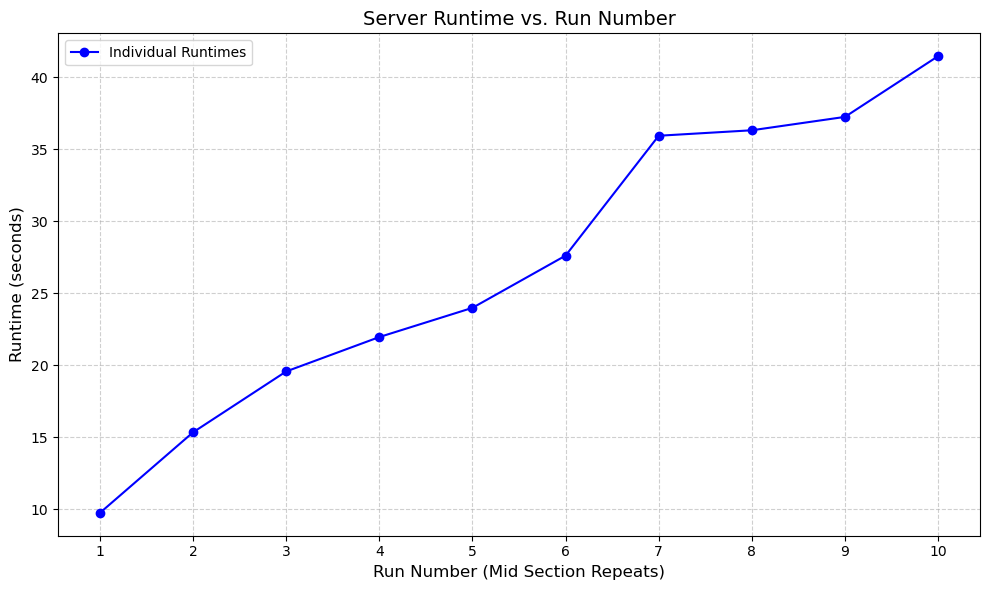

In [55]:
# Provided data
run_numbers = list(range(1, 11))
runtimes = ["0:09.74", "0:15.34", "0:19.57", "0:21.96", "0:23.99", 
            "0:27.62", "0:35.95", "0:36.33", "0:37.26", "0:41.48"]

# Function to convert runtime strings to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Convert runtimes to seconds
runtime_seconds = [time_to_seconds(rt) for rt in runtimes]

# Plotting individual runtimes
plt.figure(figsize=(10, 6))
plt.plot(run_numbers, runtime_seconds, marker='o', linestyle='-', color='b', label="Individual Runtimes")

# Labels and title
plt.title("Server Runtime vs. Run Number", fontsize=14)
plt.xlabel("Run Number (Mid Section Repeats)", fontsize=12)
plt.ylabel("Runtime (seconds)", fontsize=12)
plt.xticks(run_numbers)  # Ensure the x-axis ticks align with run numbers
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


-----
b) For this part, repeat the same commands for the 10 runs above, but only change the number of workers passed to the server. Use `-w 10` instead of `-w 1`.

Produce the same plot as in Part 1, and compare the new line with the performance you measured in Part 1. Comment on the speedup that you observe thanks to the multi-threading that was introduced.
Is it more or less than what you expected?

**Runtimes Obtained:**
| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|-----------|
| 0:07.36 | 0:09.96 | 0:10.45 | 0:14.20 | 0:15.35 | 0:17.02 | 0:16.15 | 0:19.42 | 0:19.53 | 0:27.61 |


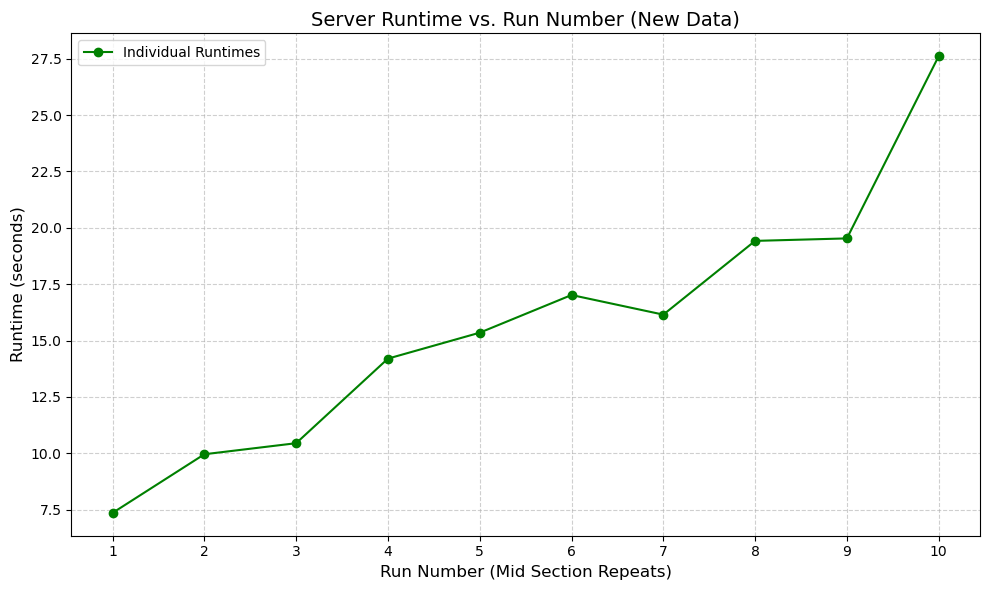

In [56]:
import matplotlib.pyplot as plt

# Provided data
run_numbers = list(range(1, 11))  # Run numbers start at 1
runtimes_new = ["0:07.36", "0:09.96", "0:10.45", "0:14.20", "0:15.35", 
                "0:17.02", "0:16.15", "0:19.42", "0:19.53", "0:27.61"]

# Function to convert runtime strings to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Convert runtimes to seconds
runtime_seconds_new = [time_to_seconds(rt) for rt in runtimes_new]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(run_numbers, runtime_seconds_new, marker='o', linestyle='-', color='g', label="Individual Runtimes")

# Labels and title
plt.title("Server Runtime vs. Run Number (New Data)", fontsize=14)
plt.xlabel("Run Number (Mid Section Repeats)", fontsize=12)
plt.ylabel("Runtime (seconds)", fontsize=12)
plt.xticks(run_numbers)  # Ensure the x-axis ticks align with run numbers
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Looking at the two graphs, we can see a noticable difference in the speed when using 1 worker as compared to using 10 workers. Using 10 workers was significantly faster, giving us an expected improvement in performance. This result indicates that there an improvement in the speedup due to the introduction of the multi-threading.

------
c) For this part, we will run an experiment very similar to Part 2. In particular, we will still use `-w 10` but we will change how the Mid section is constructed. The new Mid section will be:

(2) Mid (repeating pattern):

`0:r:1:0,0:r:1:1,0:r:1:2,0:r:1:3,0:r:1:4,0:r:1:5,0:r:1:6,0:r:1:7,0:r:1:8,0:r:1:9,\
0:b:1:0,0:b:1:1,0:b:1:2,0:b:1:3,0:b:1:4,0:b:1:5,0:b:1:6,0:b:1:7,0:b:1:8,0:b:1:9,\
0:s:1:0,0:s:1:1,0:s:1:2,0:s:1:3,0:s:1:4,0:s:1:5,0:s:1:6,0:s:1:7,0:s:1:8,0:s:1:9,\
0:v:1:0,0:v:1:1,0:v:1:2,0:v:1:3,0:v:1:4,0:v:1:5,0:v:1:6,0:v:1:7,0:v:1:8,0:v:1:9,\
0:h:1:0,0:h:1:1,0:h:1:2,0:h:1:3,0:h:1:4,0:h:1:5,0:h:1:6,0:h:1:7,0:h:1:8,0:h:1:9,\
0:r:1:0,0:r:1:1,0:r:1:2,0:r:1:3,0:r:1:4,0:r:1:5,0:r:1:6,0:r:1:7,0:r:1:8,0:r:1:9,\
0:b:1:0,0:b:1:1,0:b:1:2,0:b:1:3,0:b:1:4,0:b:1:5,0:b:1:6,0:b:1:7,0:b:1:8,0:b:1:9,\
0:s:1:0,0:s:1:1,0:s:1:2,0:s:1:3,0:s:1:4,0:s:1:5,0:s:1:6,0:s:1:7,0:s:1:8,0:s:1:9,\
0:v:1:0,0:v:1:1,0:v:1:2,0:v:1:3,0:v:1:4,0:v:1:5,0:v:1:6,0:v:1:7,0:v:1:8,0:v:1:9,\
0:h:1:0,0:h:1:1,0:h:1:2,0:h:1:3,0:h:1:4,0:h:1:5,0:h:1:6,0:h:1:7,0:h:1:8,0:h:1:9,`

Other than that, construct the full commands just like in Part 1. Next, produce one last plot with the new performance trend across the 10 runs. This plot should have three lines: one for Part 1, one for Part 2, and one for the experiment in this part.

Notice that the hashes returned by the client at the end of each run on all the experiments so far *should* match. Thus, the same exact operations are being performed on the 10 images.

Compare now the runtime trend of the system in Part 2 vs. Part 3. What is the additional speedup? Where is the additional improvement coming from if we are performing the same exact operations over the same images?

**Runtimes Obtained:**
| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|-----------|
| 0:08.12 | 0:11.78 | 0:09:16 | 0:11.82 | 0:13.87 | 0:20.33 | 0:18.64 | 0:14.03 | 0:17.27 | 0:21.12 |

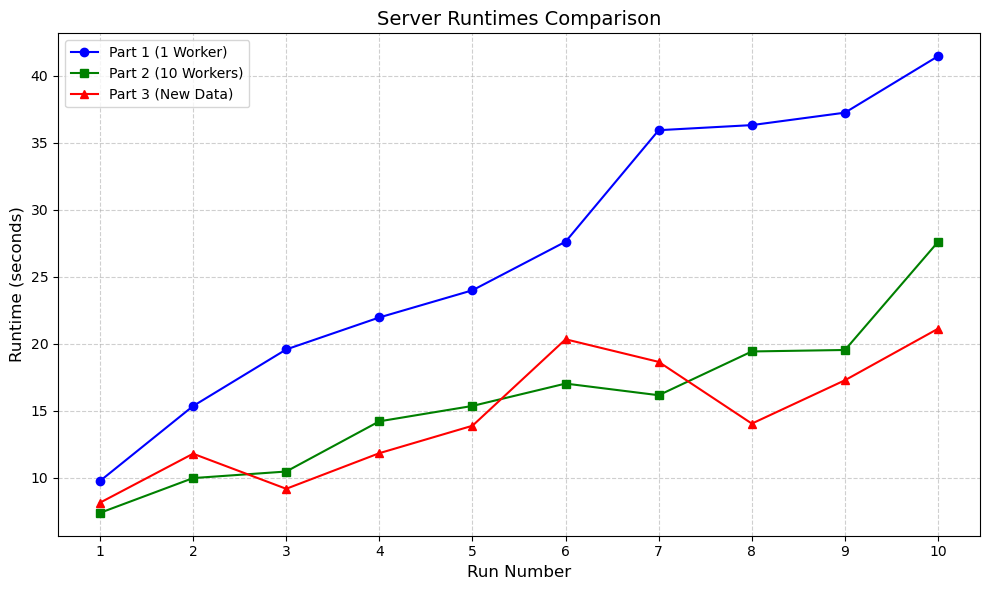

In [ ]:
import matplotlib.pyplot as plt

# Run numbers
run_numbers = list(range(1, 11))

# Part 1 Runtimes (Single-threaded)
part1_runtimes = ["0:09.74", "0:15.34", "0:19.57", "0:21.96", "0:23.99", 
                  "0:27.62", "0:35.95", "0:36.33", "0:37.26", "0:41.48"]

# Part 2 Runtimes (10 Workers)
part2_runtimes = ["0:07.36", "0:09.96", "0:10.45", "0:14.20", "0:15.35", 
                  "0:17.02", "0:16.15", "0:19.42", "0:19.53", "0:27.61"]

# Part 3 Runtimes (New data)
part3_runtimes = ["0:08.12", "0:11.78", "0:09.16", "0:11.82", "0:13.87", 
                  "0:20.33", "0:18.64", "0:14.03", "0:17.27", "0:21.12"]

# Function to convert runtime strings to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Convert all runtimes to seconds
part1_seconds = [time_to_seconds(rt) for rt in part1_runtimes]
part2_seconds = [time_to_seconds(rt) for rt in part2_runtimes]
part3_seconds = [time_to_seconds(rt) for rt in part3_runtimes]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each part's runtimes
plt.plot(run_numbers, part1_seconds, marker='o', linestyle='-', color='b', label="Part 1 (1 Worker)")
plt.plot(run_numbers, part2_seconds, marker='s', linestyle='-', color='g', label="Part 2 (10 Workers)")
plt.plot(run_numbers, part3_seconds, marker='^', linestyle='-', color='r', label="Part 3 (New Data)")

# Labels and title
plt.title("Server Runtimes Comparison", fontsize=14)
plt.xlabel("Run Number", fontsize=12)
plt.ylabel("Runtime (seconds)", fontsize=12)
plt.xticks(run_numbers)  
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Comparing the trend of the system in Part 2 to Part 3, we can see that Part 3 has a better runtime. The additional speedup observed in Part 3 compared to Part 2 comes from how operations are processed. In Part 3, it allows for better parallelism, in which operations like rotation, blur, sharpen, etc., are applied to all images at once, allowing the system to process them in parallel. This is faster than processing each image sequentially in Part 2. Part 3 also groups similar operations, making better use of CPU resources, which helps with the speed up overall process. By applying the same operation to all images at once, Part 3 reduces the overhead of repeatedly loading and processing each image separately. The additional improvement in Part 3 comes from applying the same operations to all images at once, allowing for parallel processing, efficient use of resources, and reduced overhead.

-----
d) No more experiments here! But just a conceptual question. You see that both the experiments in Part 2 and 3 perform the same exact operations on the images. Yet, the server exhibits different performance.

Is there a better strategy to schedule the requests in the queue that could allow the server to exhibit the same performance on both experiments? No need to overthink this. Provide an exact scheduler
policy in your answer in a way that, ideally, a person reading your answer should be able to implement the policy you are describing.

To improve performance and make it consistent between Part 2 and Part 3, we can first process all images for one operation at a time. Instead of switching between operations for each image (e.g., rotating one image, then blurring another), process all images for the same operation first. We can create separate queues for each operation (rotate, blur, sharpen, etc.). Then start processing the next operation as the current queue is empty. 

This reduces the overhead of switching between different operations, making the server more efficient. By processing all images for one operation before moving to the next, the server can handle operations more quickly and consistently.